In [1]:
import pickle
import numpy as np
import torch
import random
from matplotlib import pyplot as plt

from lstm_data_prep import prep
from rnn_perm_test import iterateLSTM
from lstm import test_model_lstm, initialize_lstm

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
with open('HCP_movie_watching.pkl','rb') as f:
    TS = pickle.load(f)

input_size = 300
hidden_size = 32
n_layers = 1
seq_len = 90
class_num = 15

_, test_loader = prep(TS)

c:\Users\Anna&Megan\Documents\GitHub\srp-lab-notebook\hcp_data\lstm_data_prep.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_padded = paddingArr(np.array(X_arr))


In [3]:
lstmModel, lstmOptim, lstmLoss = initialize_lstm(input_size, hidden_size, seq_len)

check = torch.load("lstm-model.pt")
lstmModel.load_state_dict(check["lstm"])
lstmOptim.load_state_dict(check["lstm_optimizer"])

lstmModel.eval()

lstm_accuracy = test_model_lstm(lstmModel, test_loader, lstmLoss, seq_len)

In [4]:
# Run permutation test on model
permutation_lstm_accuracy = iterateLSTM(lstmModel, lstmLoss, TS)

In [8]:
%store permutation_lstm_accuracy

Stored 'permutation_lstm_accuracy' (ndarray)


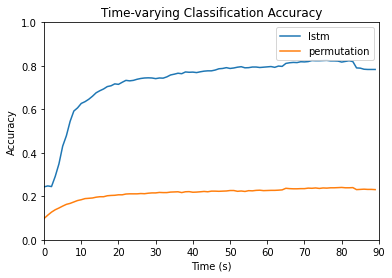

In [9]:
# Compare accuracies
xAx = [i for i in range(0,90)]
plt.plot(xAx, lstm_accuracy, label="lstm")
plt.plot(xAx, permutation_lstm_accuracy, label="permutation")
plt.xlabel("Time (s)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xlim(0,90)
plt.title("Time-varying Classification Accuracy")
plt.legend()
plt.show()

In [10]:
%store lstm_accuracy

Stored 'lstm_accuracy' (ndarray)
